In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import matplotlib

In [73]:
df=pd.read_csv("D:\\Prediction of house rent\\archive\\allcities.csv")
print(df.shape)
df.drop_duplicates(inplace = True)

(193011, 10)


In [74]:
print(df.columns)

Index(['seller_type', 'bedroom', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom', 'city'],
      dtype='object')


Names of states:- 
 1)Ahmedabad	2)Banglore
3)Chennai	4)Delhi
5)Hyderabad	6)Kolkata
7)Mumbai	8)Pune
Enter state name:- Pune
Enter locality:-Moshi


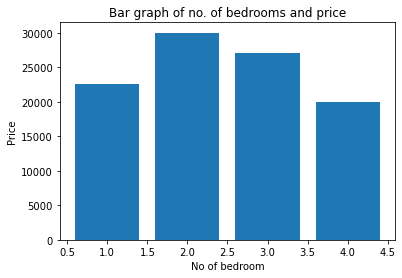

In [82]:
print("Names of states:- \n 1)Ahmedabad\t2)Banglore\n3)Chennai\t4)Delhi\n5)Hyderabad\t6)Kolkata\n7)Mumbai\t8)Pune")
state=input("Enter state name:- ")
newdf=df[df['city']==state]
local=input("Enter locality:-")
locdf=newdf[newdf['locality']==local]
plt.bar(locdf['bedroom'],locdf['price'])
plt.xlabel("No of bedroom")
plt.ylabel("Price")
plt.title("Bar graph of no. of bedrooms and price")
plt.show()

C:\Users\RAMONJ~1\AppData\Local\Temp/ipykernel_17528/1292665163.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[col].value_counts().index , rotation = 90,**{'font':'serif', 'size':7.5, 'weight':'bold'}, alpha = 1)
C:\Users\RAMONJ~1\AppData\Local\Temp/ipykernel_17528/1292665163.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


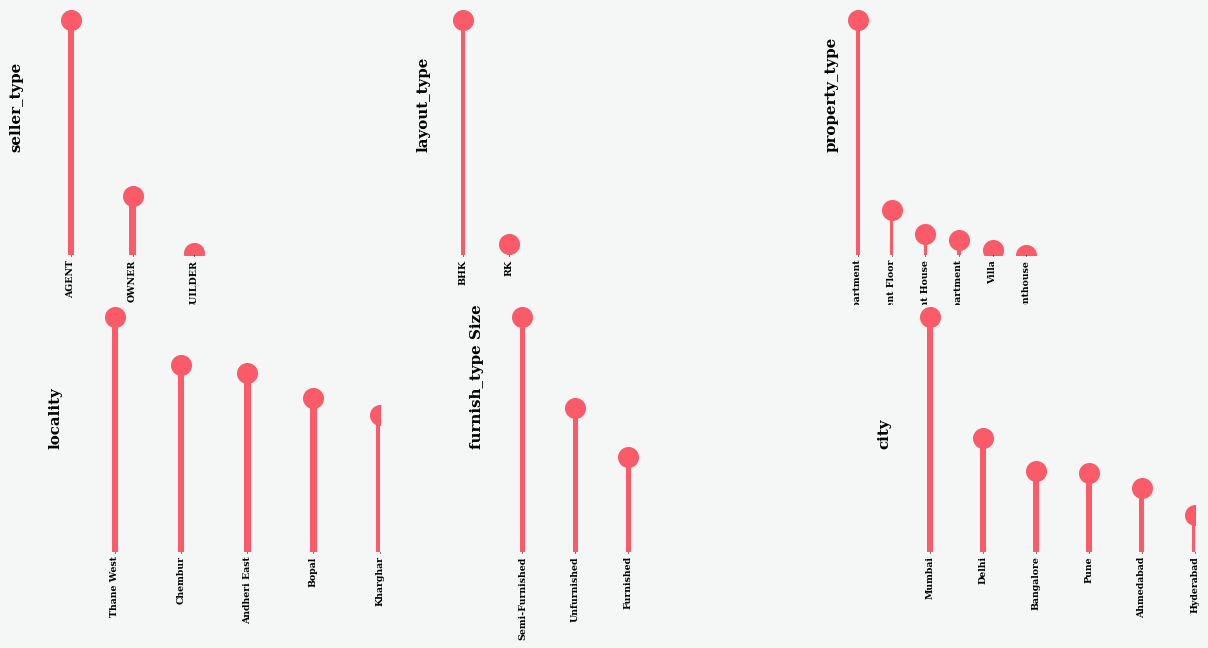

In [33]:
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
fig =  plt.figure(figsize = (17,8), dpi = 90)
fig.patch.set_facecolor('#f5f6f6')
gs = fig.add_gridspec(2,3)
gs.update(wspace =0.1,hspace = 0.2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
axes = [ax0,ax1,ax2,ax3, ax4,ax5,]
for ax in axes:
    ax.set_facecolor('#f5f6f6')
    ax.tick_params(axis='x',
                   labelsize = 1, which = 'major',
                   direction = 'out',pad = 2,
                   length = 1)
    ax.tick_params(axis='y', colors= 'black')
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(True)
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
cols = df.select_dtypes(exclude = ['int64','float64','float']).columns
labels = ['seller_type', 'layout_type', 'property_type', 'locality', 'furnish_type Size', 'city']
s = 250

for col,ax,label in zip(cols,axes,labels):
    ax.bar(x = df[col].value_counts().index, height = df[col].value_counts().values, width = 0.1, color = colors[0] )
    ax.scatter(x = df[col].value_counts().index, y = df[col].value_counts().values, s = s,color = '#FB5B68')
    ht = df[col].value_counts().values.max()
    ax.text(-1,ht/2.2 ,label,**{'font':'serif', 'size':12, 'weight':'bold', 'rotation' : 'vertical'}, alpha = 1)
    ax.set_xticklabels(df[col].value_counts().index , rotation = 90,**{'font':'serif', 'size':7.5, 'weight':'bold'}, alpha = 1)
    ax0.set_xlim(-1,5)
ax1.set_xlim(-1,7)
ax2.set_xlim(-1,10)
ax3.set_xlim(-1.6,4)
ax4.set_xlim(-2,5)
ax5.set_xlim(-2,5)
fig.show()

C:\Users\RAMONJ~1\AppData\Local\Temp/ipykernel_17528/1949006619.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1=round(df[['price', 'property_type']].groupby('property_type').apply(lambda x: x.mean()))


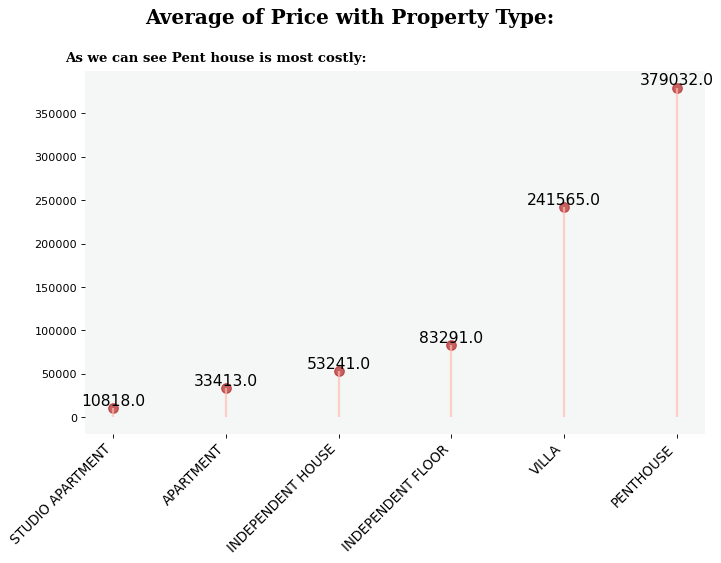

In [34]:
df1=round(df[['price', 'property_type']].groupby('property_type').apply(lambda x: x.mean()))
df1.sort_values('price',inplace=True)
df1.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax.vlines(x=df1.index,ymin=0,ymax=df1.price,color = colors[3],alpha=0.7,linewidth=2)
ax.scatter(x=df1.index, y=df1.price, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
#ax.set_title('Average of Property Type With Price', fontdict={'size':22})

ax.set_xticks(df1.index)
ax.set_xticklabels(df1.property_type.str.upper(), rotation=45, fontdict={'horizontalalignment': 'right', 'size':12})

ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
for row in df1.itertuples():
    ax.text(row.Index, row.price+.5, s=round(row.price, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

fig.text(0.2,0.98,"Average of Price with Property Type:",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"As we can see Pent house is most costly:",**{'font':'serif', 'size':12,'weight':'bold'}, alpha = 1)

plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

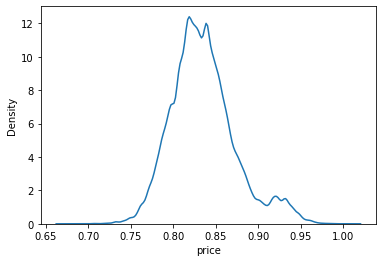

In [38]:
import numpy as np
df['price']=np.log(df["price"])
df['area']=np.log(df['area'])
sns.kdeplot(df["price"])

Enter state name: Pune


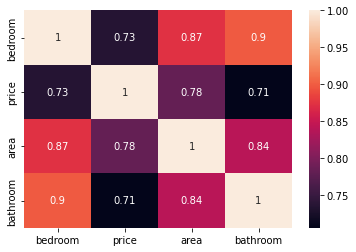

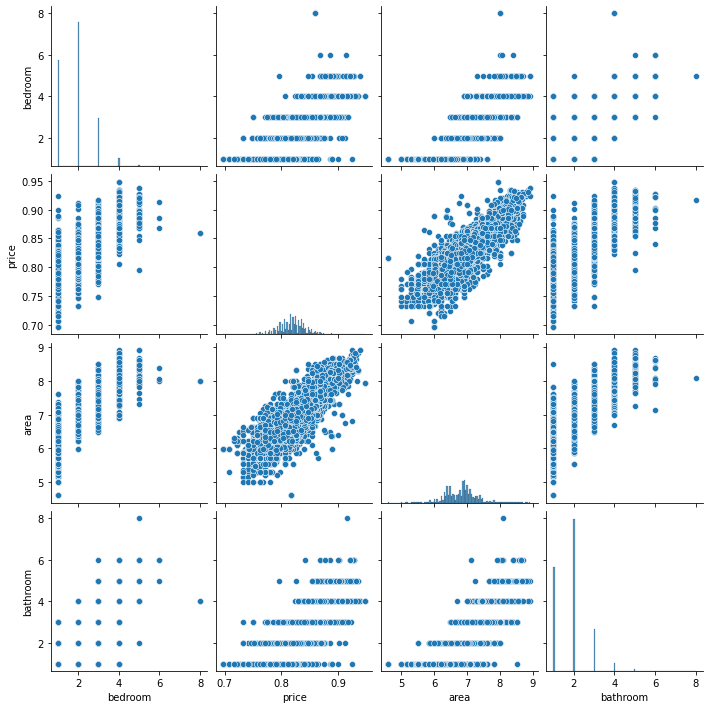

In [41]:
st=input("Enter state name: ")
newst = df[df["city"]==st]
corelation=newst.corr(method='spearman')
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)
plt.show()
sns.pairplot(newst)
plt.show()

Enter name of state:Pune
Enter seller type :AGENT
(16146, 10)


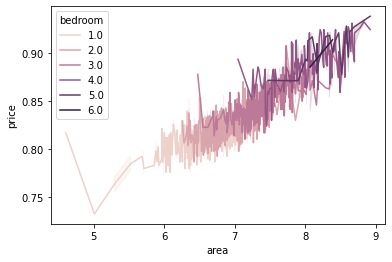

In [68]:
st=input("Enter name of state:")
state2=df[df['city']==st]
own=input("Enter seller type :")
state2=state2[state2['seller_type']==own]
print(state2.shape)
sns.lineplot(x="area",y="price",hue="bedroom",data=state2)
plt.show()

In [76]:
des_stats = df.describe(exclude = ['object']).drop(index = ['count'], axis = 0).T
skew = []
kurt = []
num_cols = df.select_dtypes(exclude = ['object']).columns
for col in num_cols:
    skew.append(df[col].skew().round(1))
    kurt.append(df[col].kurt().round(1))

stats = pd.DataFrame({'skew':skew,'kurt':kurt}, index = num_cols)

all_stats = pd.merge(left = des_stats,right = stats, left_index = True, right_index = True)

C:\Users\RAMONJ~1\AppData\Local\Temp/ipykernel_17528/2692410558.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


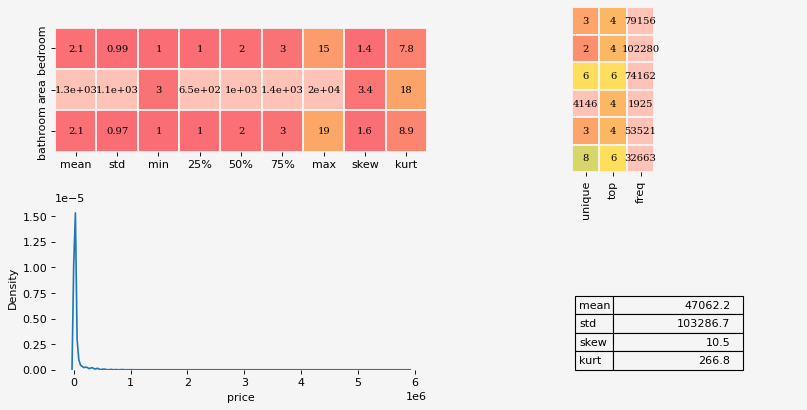

In [77]:
fig = plt.figure(figsize =(12,6), dpi = 80)
fig.patch.set_facecolor('#f6f5f5')

gs = fig.add_gridspec(2,2)
gs.update(wspace = 0, hspace = 0.2)

back_ground = '#f6f5f5'
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

axes = [ax1,ax2, ax3]

for ax in axes:
    for loc in ['left','right','top','bottom']:
        ax.spines[loc].set_visible(False)
    ax.set_facecolor('#f6f5f5')
    

#colormap for visualization
colormap  = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


#### statistics of numerical features 
sns.heatmap(all_stats.drop(index = ['price']),
            annot = True, ax = ax1, 
            vmin = -0, vmax = 120,
            square = True, linewidths = 0.09,linecolor = '#f6f5f5',
            cbar = False,
            cmap =colormap, annot_kws={'font':'serif', 'size':9, 'weight':'normal', 'color':'black'}, alpha = 0.9)

#### statistics of target
#ax4 = ax2.twinx()
sns.kdeplot( df['price'], ax = ax3, palette= [colors[0]])

sx = df.describe(exclude = ['int64', 'float64','float']).drop(index = ['count'], axis = 0).T
sx['top']= ['4', '4', '6','4','4','6']
sx = sx.astype(int)

sns.heatmap(sx,annot = True,fmt = '1.0f',vmin = -0, vmax = 20,ax = ax2,
            square = True, linewidths = 0.09,cbar = False,linecolor = '#f6f5f5',
            cmap =colormap, annot_kws={'font':'serif', 'size':9, 'weight':'normal', 'color':'black'}, alpha =0.9)

## labeling stats in violin plot
pr = df['price'].describe().drop(index = ['count', 'mean','std'], axis = 0)
 


ax2.axes.get_yaxis().set_visible(False)

### price stats table
price_stats = all_stats.T['price'].to_frame().round(1)
price_stats = (price_stats.T[['mean', 'std', 'skew', 'kurt']]).T
bbox = [0.5, 0, 0.35, 0.45]
ax4.table(cellText = price_stats.values, rowLabels = price_stats.index, 
          bbox=bbox,cellColours = np.array(['#f6f5f5','#f6f5f5','#f6f5f5','#f6f5f5']).reshape(-1,1),
          rowColours = ['#f6f5f5','#f6f5f5','#f6f5f5','#f6f5f5'])
ax4.axis('off')
fig.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


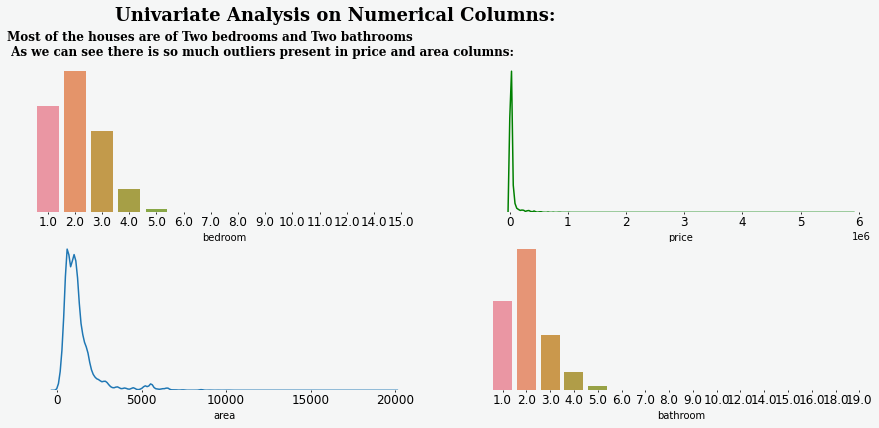

In [80]:
fig =  plt.figure(figsize = (15,6))
fig.patch.set_facecolor('#f5f6f6')


                                                   
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.2,hspace= 0.2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

axes=[ax0,ax1,ax2,ax3]
for ax in axes:
    ax.set_facecolor('#f5f6f6')
    ax.tick_params(axis='x',
                   labelsize = 12, which = 'major',
                   direction = 'out',pad = 2,
                   length = 1.5)
    ax.tick_params(axis='y', colors= 'black')
    ax.axes.get_yaxis().set_visible(False)
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)


        
cols = df.select_dtypes(exclude = 'object').columns

sns.countplot(df[cols[0]],ax=ax0)
sns.kdeplot(x = df[cols[1]],color="green",ax = ax1)
sns.kdeplot(x = df[cols[2]],ax = ax2)
sns.countplot(df[cols[3]],ax=ax3)

fig.text(0.2,0.98,"Univariate Analysis on Numerical Columns:",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"Most of the houses are of Two bedrooms and Two bathrooms \n As we can see there is so much outliers present in price and area columns:",**{'font':'serif', 'size':12,'weight':'bold'}, alpha = 1)
plt.show()

C:\Users\RAMONJ~1\AppData\Local\Temp/ipykernel_17528/1949006619.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1=round(df[['price', 'property_type']].groupby('property_type').apply(lambda x: x.mean()))


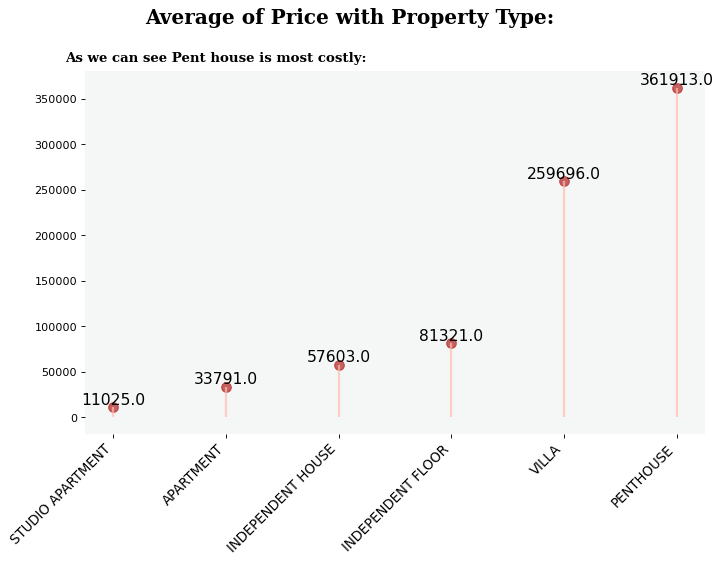

In [81]:
df1=round(df[['price', 'property_type']].groupby('property_type').apply(lambda x: x.mean()))
df1.sort_values('price',inplace=True)
df1.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax.vlines(x=df1.index,ymin=0,ymax=df1.price,color = colors[3],alpha=0.7,linewidth=2)
ax.scatter(x=df1.index, y=df1.price, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
#ax.set_title('Average of Property Type With Price', fontdict={'size':22})

ax.set_xticks(df1.index)
ax.set_xticklabels(df1.property_type.str.upper(), rotation=45, fontdict={'horizontalalignment': 'right', 'size':12})

ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
for row in df1.itertuples():
    ax.text(row.Index, row.price+.5, s=round(row.price, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

fig.text(0.2,0.98,"Average of Price with Property Type:",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"As we can see Pent house is most costly:",**{'font':'serif', 'size':12,'weight':'bold'}, alpha = 1)

plt.show()